In [2]:
import pandas as pd
import json


In [3]:
# Load the JSON data from file
file_path = 'problems MoonBoard Masters 2017 40.json'  # Replace with your actual file path

with open(file_path, 'r') as file:
    data = json.load(file)

# Normalize and convert JSON data to DataFrame
df = pd.json_normalize(data['data'])

# Display the first few rows
df.head()


,name,grade,userGrade,setbyId,setby,method,userRating,repeats,isBenchmark,isMaster,...,holdsets,hasBetaVideo,moonBoardConfigurationId,apiId,dateInserted,dateUpdated,dateDeleted,holdsetup.description,holdsetup.holdsets,holdsetup.apiId
0,Fat Guy In A Little Suit,6B+,6B+,55C65799-AB21-496C-A34E-1CC4B3210B27,Kyle Knapp,Feet follow hands,4,199,False,False,...,"[{'description': 'Hold Set A', 'locations': No...",False,1,305445,2017-10-20T11:27:40.393,2023-08-03T02:03:52.697,None,MoonBoard Masters 2017,None,15
1,White Lines,6C,6C,55C65799-AB21-496C-A34E-1CC4B3210B27,Kyle Knapp,Feet follow hands,4,339,False,False,...,"[{'description': 'Hold Set A', 'locations': No...",True,1,305449,2017-10-20T11:27:40.393,2023-08-03T18:47:59.953,None,MoonBoard Masters 2017,None,15
2,Allez!!!,6B+,6B+,55C65799-AB21-496C-A34E-1CC4B3210B27,Kyle Knapp,Feet follow hands,4,174,False,False,...,"[{'description': 'Hold Set A', 'locations': No...",False,1,305451,2017-10-20T11:27:40.393,2023-08-03T02:12:07.757,None,MoonBoard Masters 2017,None,15
3,"TO JUG, OR NOT TO JUG...",6A+,6A+,55C65799-AB21-496C-A34E-1CC4B3210B27,Kyle Knapp,Feet follow hands,4,26153,True,False,...,"[{'description': 'Hold Set A', 'locations': No...",True,1,305454,2017-10-20T11:27:40.393,2023-08-09T09:56:24.637,None,MoonBoard Masters 2017,None,15
4,DEATH STAR,6C,6C,55C65799-AB21-496C-A34E-1CC4B3210B27,Kyle Knapp,Feet follow hands,4,8274,True,False,...,"[{'description': 'Hold Set B', 'locations': No...",True,1,305458,2017-10-20T11:27:40.393,2023-08-09T09:55:13.337,None,MoonBoard Masters 2017,None,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47534 entries, 0 to 47533
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   name                      47534 non-null  object
 1   grade                     47534 non-null  object
 2   userGrade                 24999 non-null  object
 3   setbyId                   47534 non-null  object
 4   setby                     47534 non-null  object
 5   method                    47534 non-null  object
 6   userRating                47534 non-null  int64 
 7   repeats                   47534 non-null  int64 
 8   isBenchmark               47534 non-null  bool  
 9   isMaster                  47534 non-null  bool  
 10  upgraded                  47534 non-null  bool  
 11  downgraded                47534 non-null  bool  
 12  moves                     47534 non-null  object
 13  holdsets                  47534 non-null  object
 14  hasBetaVideo          

In [4]:
# Check for missing values
df.isnull().sum()

name                            0
grade                           0
userGrade                   22535
setbyId                         0
setby                           0
method                          0
userRating                      0
repeats                         0
isBenchmark                     0
isMaster                        0
upgraded                        0
downgraded                      0
moves                           0
holdsets                        0
hasBetaVideo                    0
moonBoardConfigurationId        0
apiId                           0
dateInserted                    0
dateUpdated                  6244
dateDeleted                 47513
holdsetup.description           0
holdsetup.holdsets          47534
holdsetup.apiId                 0
dtype: int64

In [5]:
# Display basic statistics
df.describe()

,userRating,repeats,moonBoardConfigurationId,apiId,holdsetup.apiId
count,47534.000000,47534.000000,47534.0,47534.000000,47534.0
mean,3.447953,46.652817,1.0,370992.363087,15.0
std,1.633869,565.372951,0.0,49676.456423,0.0
min,0.000000,0.000000,1.0,305445.000000,15.0
25%,3.000000,1.000000,1.0,329758.750000,15.0
50%,4.000000,5.000000,1.0,354308.000000,15.0
75%,4.000000,14.000000,1.0,410832.750000,15.0
max,5.000000,33753.000000,1.0,484599.000000,15.0


In [6]:
# Count problems per grade
grade_counts = df['grade'].value_counts()
grade_counts

grade
6A+    12827
6B+     6856
6C+     5553
6B      5502
7A      4928
6C      3970
7A+     3183
7B+     1524
7B      1513
7C      1010
7C+      383
8A       141
8B+       94
8A+       35
8B        15
Name: count, dtype: int64

In [7]:
most_repeated = df[['name', 'repeats']].sort_values(by='repeats', ascending=False).head(10)
most_repeated

,name,repeats
31,IN ON THE ACTION,33753
5474,DB6,29802
694,Warm up on big ones,29239
3,"TO JUG, OR NOT TO JUG...",26153
83,REDLINE,26126
21,BLEAK HOUSE,21628
5095,SQUIRTLE,20594
349,Black Tip,19261
156,RED ONE,18723
151,VRTW 2,18166


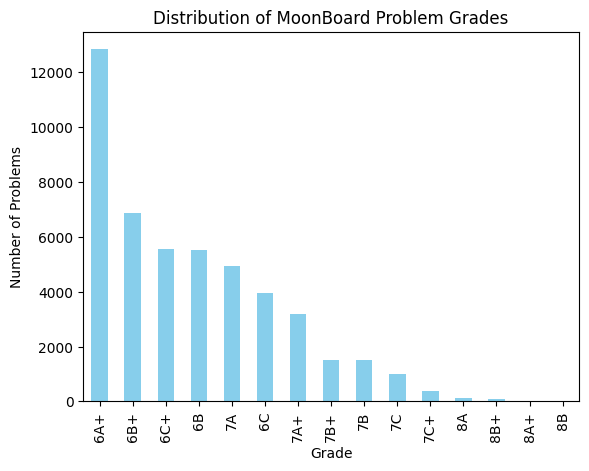

In [8]:
import matplotlib.pyplot as plt

# Plot the distribution of problem grades
grade_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of MoonBoard Problem Grades')
plt.xlabel('Grade')
plt.ylabel('Number of Problems')
plt.show()


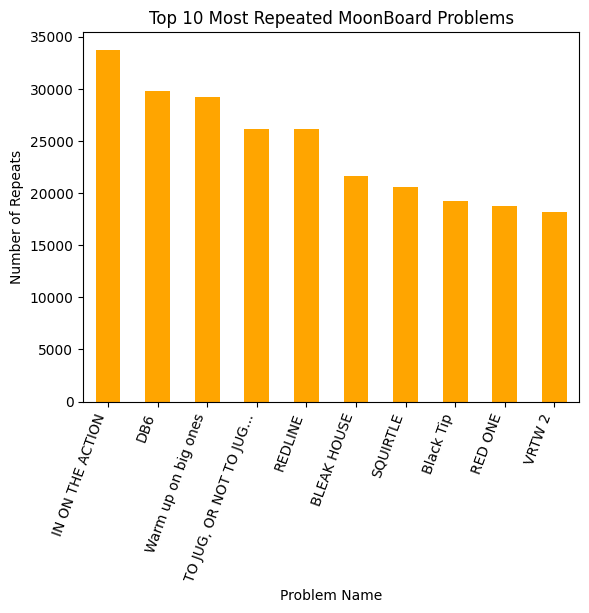

In [13]:
# Plot the most repeated problems
most_repeated.plot(kind='bar', x='name', y='repeats', legend=False, color='orange')
plt.title('Top 10 Most Repeated MoonBoard Problems')
plt.xlabel('Problem Name')
plt.ylabel('Number of Repeats')
plt.xticks(rotation=70, ha='right')
plt.show()